# NLTK - Corpora

A **text corpus** is a dataset containing **natural language** text from common sources, compiled to represent a specific domain or aspect of language. These often include books, transcripts, websites, correspondence, etc. They can also be annotated with linguistic features, and contain text in many languages.

A corpus should be large, principled, and authentic.

Unlike a simple database dump of text data (such as those offered by Wikipedia), corpora are curated to be useful in linguistic analysis, often offering balanced representation of different genres or languages, and human annotation.

- How can they be useful? What kind of projects would you use a corpus for?
- Types of corpora? diachronic/synchronic/monitor, monolingual/multilingual/parallel, raw/tagged, learner corpus, error-tagged corpus?

## 1. Exploring Corpora

NLTK enables us to access pre-compiled corpora. We will open and explore four of them today.

In [1]:
import nltk
from nltk.corpus import gutenberg, inaugural, brown, dependency_treebank
import matplotlib.pyplot as plt
import random

We download the four corpora we will study:

In [2]:
# The Gutenberg Corpus contains several literary texts from Project Gutenberg.
nltk.download('gutenberg')

# The Inaugural Address Corpus contains the texts of the inaugural addresses of U.S. presidents.
nltk.download('inaugural')

# The Brown Corpus is a standard corpus of American English texts.
nltk.download('brown')

# The Dependency Treebank Corpus contains sentences annotated with their syntactic structure.
nltk.download('dependency_treebank')

# The Punkt tokenizer is used for sentence splitting.
nltk.download('punkt')  # For tokenization

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\joaqu\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\joaqu\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\joaqu\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package dependency_treebank to
[nltk_data]     C:\Users\joaqu\AppData\Roaming\nltk_data...
[nltk_data]   Package dependency_treebank is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joaqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

And print the files that make them up:

In [3]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
# print the file IDs in the Brown corpus, alongside their corresponding categories
for fileid in brown.fileids():
    print(fileid, brown.categories(fileid)[0])

ca01 news
ca02 news
ca03 news
ca04 news
ca05 news
ca06 news
ca07 news
ca08 news
ca09 news
ca10 news
ca11 news
ca12 news
ca13 news
ca14 news
ca15 news
ca16 news
ca17 news
ca18 news
ca19 news
ca20 news
ca21 news
ca22 news
ca23 news
ca24 news
ca25 news
ca26 news
ca27 news
ca28 news
ca29 news
ca30 news
ca31 news
ca32 news
ca33 news
ca34 news
ca35 news
ca36 news
ca37 news
ca38 news
ca39 news
ca40 news
ca41 news
ca42 news
ca43 news
ca44 news
cb01 editorial
cb02 editorial
cb03 editorial
cb04 editorial
cb05 editorial
cb06 editorial
cb07 editorial
cb08 editorial
cb09 editorial
cb10 editorial
cb11 editorial
cb12 editorial
cb13 editorial
cb14 editorial
cb15 editorial
cb16 editorial
cb17 editorial
cb18 editorial
cb19 editorial
cb20 editorial
cb21 editorial
cb22 editorial
cb23 editorial
cb24 editorial
cb25 editorial
cb26 editorial
cb27 editorial
cc01 reviews
cc02 reviews
cc03 reviews
cc04 reviews
cc05 reviews
cc06 reviews
cc07 reviews
cc08 reviews
cc09 reviews
cc10 reviews
cc11 reviews
cc12 reviews

### 1.1. Analysing the Gutenberg Corpus

Let's dive into one of the texts and perform some simple explorative analysis.

We can load the dataset in several forms, including the raw characters, list of words, or list of sentences, like so:

```
raw_text = gutenberg.raw()
words = gutenberg.words()
sentences = gutenberg.sents()
```

In [6]:
# read raw text of Alice in Wonderland using .raw()
alice_raw = gutenberg.raw('carroll-alice.txt')

# print first 500 characters
print(alice_raw[0:500])   

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [7]:
# .words() method to access the text as a list of words
alice_words = gutenberg.words('carroll-alice.txt')

# print first 50 words
print(alice_words[0:50])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into']


In [8]:
# .sents() method to access the sentences
alice_sentences = gutenberg.sents('carroll-alice.txt')

# print two sentences
print(alice_sentences[6:8])

[['Oh', 'dear', '!'], ['I', 'shall', 'be', 'late', "!'"]]


Let's print some statistics about the text:

In [9]:
# print statistics
print(f"Total characters: {len(alice_raw)}")
print(f"Total words: {len(alice_words)}")
print(f"Total sentences: {len(alice_sentences)}")

Total characters: 144395
Total words: 34110
Total sentences: 1703


In [10]:
# find out number of unique words
unique_words = set(alice_words)
print(f"Total unique words: {len(unique_words)}")

Total unique words: 3016


Let's perform some frequency analysis on Alice in Wonderland. You will use `FreqDist` later on.

In [11]:
# print frequency distribution words in Alice in Wonderland
fdist = nltk.FreqDist(alice_words)
fdist

FreqDist({',': 1993, "'": 1731, 'the': 1527, 'and': 802, '.': 764, 'to': 725, 'a': 615, 'I': 543, 'it': 527, 'she': 509, ...})

In [12]:
# show 30 most common words
print(fdist.most_common(30))

[(',', 1993), ("'", 1731), ('the', 1527), ('and', 802), ('.', 764), ('to', 725), ('a', 615), ('I', 543), ('it', 527), ('she', 509), ('of', 500), ('said', 456), (",'", 397), ('Alice', 396), ('in', 357), ('was', 352), ('you', 345), ("!'", 278), ('that', 275), ('as', 246), ('her', 243), (':', 216), ('t', 216), ('at', 202), ('s', 195), ('on', 189), (".'", 187), (';', 186), ('had', 177), ('with', 175)]


Most of these aren't very insightful. Punctuation and function words are very common in all texts.

In [13]:
# filter punctuation and stopwords for better visualization
stopwords = set(nltk.corpus.stopwords.words("english"))
alice_words_filtered = [word for word in alice_words if word.lower() not in stopwords and word.isalpha()]
fdist_filtered = nltk.FreqDist(alice_words_filtered)
print(fdist_filtered.most_common(30))

[('said', 456), ('Alice', 396), ('little', 125), ('one', 94), ('know', 87), ('like', 84), ('went', 83), ('thought', 74), ('Queen', 74), ('could', 73), ('would', 70), ('time', 68), ('see', 66), ('King', 61), ('Turtle', 59), ('began', 58), ('way', 56), ('Mock', 56), ('Hatter', 55), ('Gryphon', 55), ('quite', 53), ('much', 51), ('say', 51), ('think', 50), ('head', 50), ('thing', 49), ('go', 47), ('voice', 47), ('Rabbit', 45), ('looked', 45)]


In [14]:
# ❌ don't show in class
# compute hapax legomena without using the built-in .hapaxes()
hapax_legomena = [word for word, count in fdist_filtered.items() if count == 1]
print(hapax_legomena)
print(f"Total hapax legomena: {len(hapax_legomena)}")

['Lewis', 'Carroll', 'Hole', 'conversations', 'daisy', 'chain', 'daisies', 'pink', 'wondered', 'actually', 'TOOK', 'WATCH', 'WAISTCOAT', 'POCKET', 'flashed', 'waistcoat', 'burning', 'field', 'fortunately', 'pop', 'tunnel', 'stopping', 'Either', 'plenty', 'maps', 'hung', 'pegs', 'labelled', 'ORANGE', 'MARMALADE', 'disappointment', 'empty', 'drop', 'killing', 'brave', 'centre', 'schoolroom', 'practice', 'yes', 'downward', 'Antipathies', 'country', 'New', 'Zealand', 'Australia', 'curtsey', 'CURTSEYING', 'ignorant', 'miss', 'saucer', 'dreamy', 'dozing', 'truth', 'heap', 'sticks', 'overhead', 'hurrying', 'lit', 'lamps', 'locked', 'Suddenly', 'solid', 'belong', 'curtain', 'fifteen', 'lock', 'fitted', 'rat', 'knelt', 'loveliest', 'wander', 'doorway', 'lately', 'telescopes', 'printed', 'letters', 'Drink', 'histories', 'burnt', 'eaten', 'poker', 'bleeds', 'disagree', 'flavour', 'cherry', 'tart', 'custard', 'pine', 'apple', 'roast', 'turkey', 'toffee', 'buttered', 'toast', 'shrink', 'flame', 'bl

Why and when to filter stopwords and punctuation? what about capitalisation?

### 1.2. ✏️ Your turn!

Try performing a similar exploration of the `inaugural` or `brown` corpus. Any surprises? What about if you restrict it to one of their files or categories?

For either the entire corpus or one of the files/categories, print:

- The number of words
- The 30 most common words
- The 30 most common words, filtering out stopwords and punctuation

Extra:
- Find "Hapax legomenons": words that occur only once in a corpus. Hint: `fdist['word']` returns the count for that word. So you can do `for word in fdist.keys():`...
- Normalise capitalisation, so that "The" and "the" are counted as the same word. Hint: in Python, you can do `word.lower()` to get the lowercase version of a word.

In [15]:
# ✏️ STUDENTS: Your code here!

What can we learn by exploring a corpus in this way? 

### 1.3. Comparative Analysis

What can comparing different corpora or categories within a corpus tell us?

Finding differences between texts of different genres, authors, or periods is called **stylistics**.

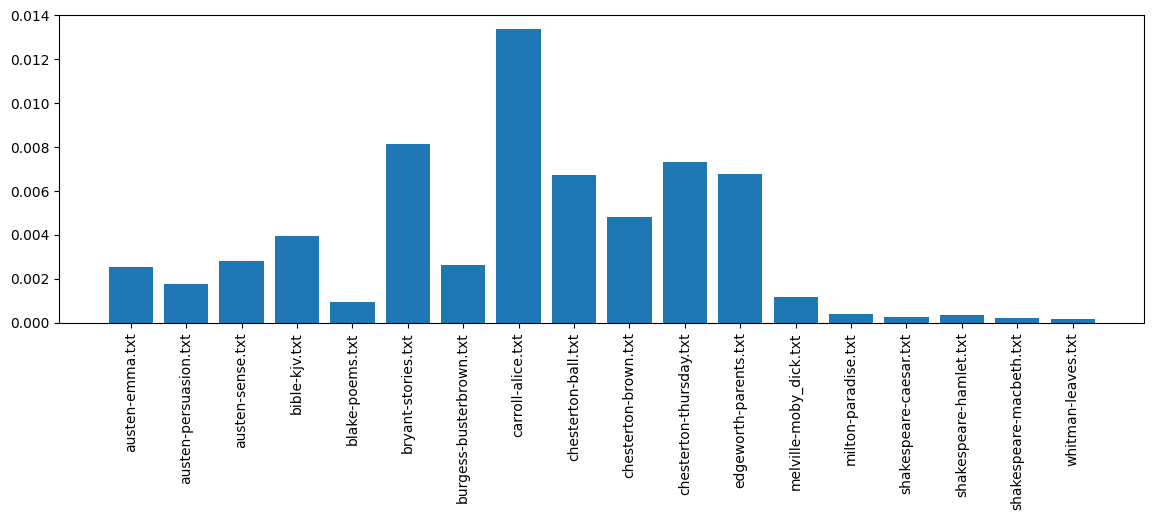

In [16]:
# use FreqDist to compute proportions of "said" per Gutenberg file
fd_gutenberg = []
for fileid in gutenberg.fileids():
    proportion = nltk.FreqDist(gutenberg.words(fileid))['said'] / len(gutenberg.words(fileid))
    fd_gutenberg.append(proportion)

# plot the proportion of "said" in each Gutenberg file as a barplot
plt.figure(figsize=(14,4))
plt.bar(gutenberg.fileids(), fd_gutenberg)
plt.xticks(rotation=90)
plt.show()

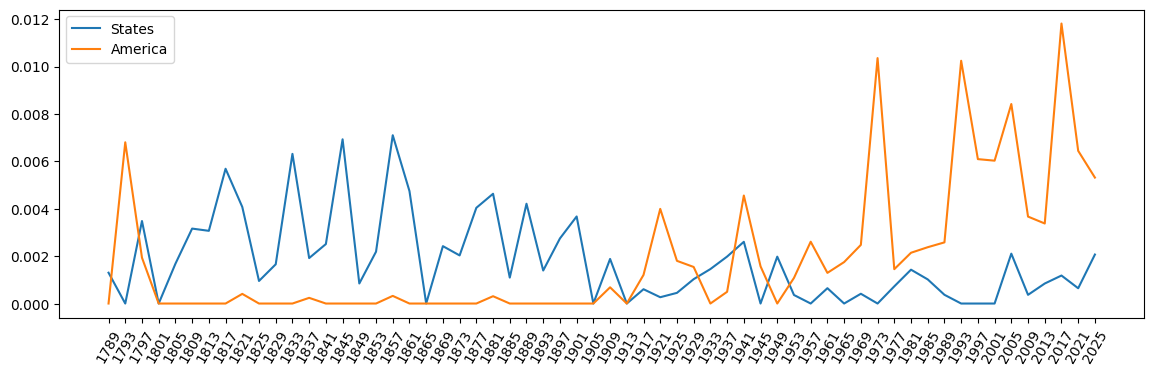

In [ ]:
# use FreqDist to compute counts of "states" and "america" per inaugural address

# IDs look like '1789-Washington.txt', so we extract the year part
address_ids = inaugural.fileids()
years = [fileid[:4] for fileid in address_ids]

fd_inaugural_states = []
fd_inaugural_america = []

for id in address_ids:
    fd_inaugural_states.append(nltk.FreqDist(inaugural.words(id))['States']/len(inaugural.words(id)))
    fd_inaugural_america.append(nltk.FreqDist(inaugural.words(id))['America']/len(inaugural.words(id)))

# plot the occurrence of "united" and "america" in each inaugural address as a line plot
plt.figure(figsize=(14,4))
plt.plot(years, fd_inaugural_states, label='States')
plt.plot(years, fd_inaugural_america, label='America')
plt.xticks(rotation=60)
plt.legend()
plt.show()

Noticed how we used proportions with the Gutenberg corpus, but total counts with the inaugural corpus? What are the pros and cons?

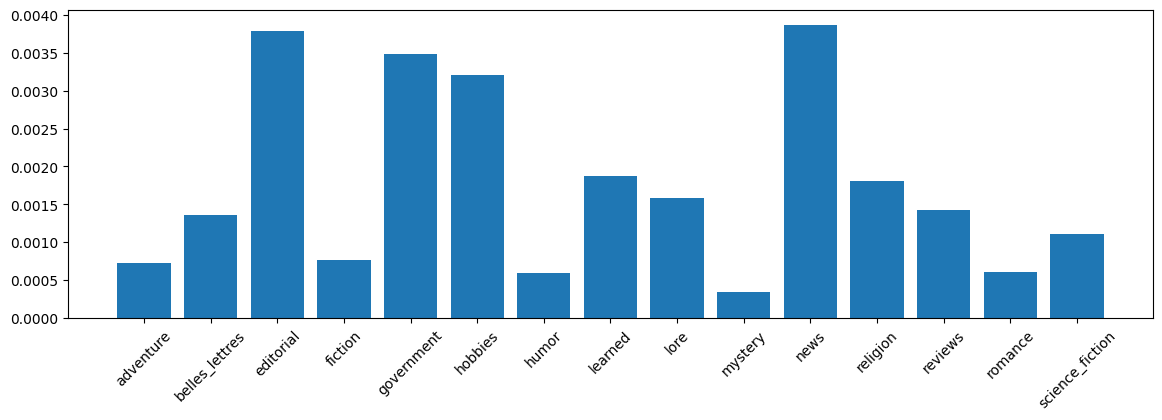

In [18]:
# use FreqDist to compute proportions of "will" per Brown file
fd_brown = []
for category in brown.categories():
    proportion = nltk.FreqDist(brown.words(categories=category))['will'] / len(brown.words(categories=category))
    fd_brown.append(proportion)

# plot the proportion of "will" in each Brown file as a barplot
plt.figure(figsize=(14,4))
plt.bar(brown.categories(), fd_brown)
plt.xticks(rotation=45)
plt.show()

What happens if we switch to "could"?

### 1.4. ✏️ Test your own hypothesis

Use the examples above to come up with your own comparative hypothesis and test it. Some examples:
- Are words in a certain category of Brown longer on average than in another one?
- Does an antiquated term fade out of use in Inauguration as the years go by?
- Do poems use a certain word more frequently than novels? what about plays?

In [19]:
# ✏️ STUDENTS: Your code here!

## 2. Annotated Corpora

Corpora are often annotated with linguistic features. Which ones do you think would be useful, and for what tasks?

In [20]:
# Explore Brown corpus annotations: print tagged words in the "news category"
brown.tagged_words(categories='news')[0:15]  

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD')]

Do you recognise these tags? https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

Let's look at another corpus, this time it's tagged with a _Dependency Parse_. Such corpora are called "treebanks".

In [21]:
# Load Dependency Treebank corpus, format as conll, and print
conll_format_string = dependency_treebank.parsed_sents()[7].to_conll(3)
for i,line in enumerate(conll_format_string.split('\n')):
    print(i+1, line)

1 A	DT	3
2 Lorillard	NNP	3
3 spokewoman	NN	4
4 said	VBD	0
5 ,	,	4
6 ``	``	4
7 This	DT	8
8 is	VBZ	4
9 an	DT	11
10 old	JJ	11
11 story	NN	8
12 .	.	4
13 


✏️ Now try using the Brown Corpus' annotations to do some analysis of your own:
- What are the most common verbs per category? Any insightful differences?
- How does pronoun use change in each category? What can pronouns tell us about a text?

In [22]:
# ✏️ STUDENTS: Your code here!

## 3. ✏️ Creating your own Corpus

NLTK allows us to build our own corpus from text files. Find a book you like at https://www.gutenberg.org/ebooks/categories, and open it as "Plain Text UTF-8". Hit `Ctrl+S` or `Cmd+S` to save it in the same directory as this notebook.



In [23]:
# Read a txt file using PlaintextCorpusReader, and print fileids
my_file = 'common_sense.txt'
my_corpus = nltk.corpus.PlaintextCorpusReader('.', my_file)
my_corpus.fileids()

['common_sense.txt']

In [24]:
# Print excerpt from my corpus
my_corpus_words = my_corpus.words(my_file)
print(my_corpus_words[281:320])

['Common', 'Sense', 'By', 'Thomas', 'Paine', 'INTRODUCTION', '.', 'Perhaps', 'the', 'sentiments', 'contained', 'in', 'the', 'following', 'pages', ',', 'are', 'not', 'yet', 'sufficiently', 'fashionable', 'to', 'procure', 'them', 'general', 'favor', ';', 'a', 'long', 'habit', 'of', 'not', 'thinking', 'a', 'thing', 'wrong', ',', 'gives', 'it']


Now, use the code from earlier to print some statistics about your file:
- The 30 most common words, filtering out stopwords and punctuation, and ignoring capitalisation
- Find the most common word in the Brown corpus that does not appear in your corpus. _Hint_: You can create a `FreqDist` of both corpora, and use `for word, count in fdist.most_common(100)` to find it.


In [25]:
# ✏️ STUDENTS: Your code here!

### ✏️ Extra activity: Zipf's Law

Verify Zipf's law using different corpora. Zipf's law states that the frequency of the Nth most common word is proportional to 1/N, so the second most common word appears 1/2 as many times as the first, and the third appears 1/3 as many times as the first.

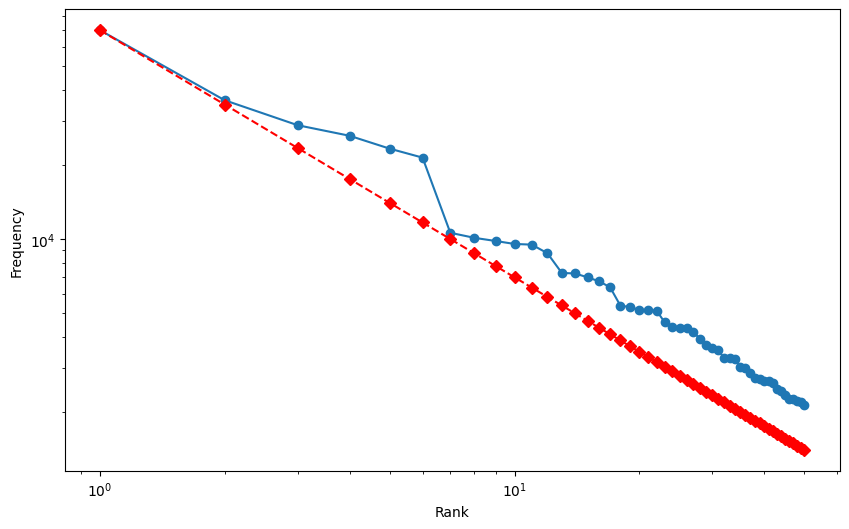

In [26]:
# Create a FreqDist of the corpus, filtering out stopwords and punctuation, and ignoring capitalisation
stopwords = set(nltk.corpus.stopwords.words("english"))
brown_words = brown.words()
brown_words = [word.lower() for word in brown.words()]
brown_words_filtered = [word for word in brown_words if word.isalpha()]
fdist_filtered = nltk.FreqDist(brown_words_filtered)
most_common = fdist_filtered.most_common(50)


# plot against 1/rank
ranks = range(1, 50 + 1)
frequencies = [freq for (word, freq) in most_common]

plt.figure(figsize=(10,6))
plt.plot(ranks, frequencies, marker='o')
plt.plot(ranks, [frequencies[0]/rank for rank in ranks], linestyle='dashed', color='red', marker='D')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.yscale("log")
plt.xscale("log")
plt.show()

Now try your own corpus:

In [27]:
# ✏️ STUDENTS: Your code here!

## 4. Generating Random Text with Bigrams

Bigrams are word pairs that appear consequtively in a text. So the text "I had some coffee" has 3 bigrams, (I had), (had some), and (some coffee).

- Have you encountered bigrams before? What about N-grams?
- How can they be useful?

In [28]:
# Create a function that given a word will output a likely next word
def generate_model(cfdist, word, num=50):
    for i in range(num):
        print(word, end=' ')
        followers = list(cfdist[word].keys())
        if not followers:
            break
        weights = [cfdist[word][f] for f in followers]
        word = random.choices(followers, weights=weights, k=1)[0]

In [29]:
# Test our function with the Brown corpus
text = brown.words()
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

generate_model(cfd, 'The')

The first major general setting , just you carried him about this broken-nosed man , Princeton , full classical oedipal fantasy in a good to GOP task , but firmly into being a few fried eggs and from the interim governmental procedure by putting it must include under the other 

Now try it with your own corpus! Anything interesting? 

In [30]:
# ✏️ STUDENTS: Your code here!

Some questions:
- What are the limitations of bigrams? 
- How big should N be so that N-grams are useful? 
- How do modern machine learning models differ from N-grams?